# First Things first
Taking the same fields in 2019 research and aply it to 2020 data set with the same Algorithms

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import os

In [2]:
REPORTS_PATH = './Report/'
FINAL_REPORT = './Report/Final-Report.txt'
if not os.path.exists(REPORTS_PATH):
    os.makedirs(REPORTS_PATH)
data = pd.read_csv('data_2020.csv')
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Point One: The Relationship between coding as a hobby and the salary
Total Paid annually: 3606145279 Per Year
Avg: 103756 Per Year
Average Salary for Hobbyists: 104621 Per Year
Percent ~= 77
Average Salary for None-Hobbyists: 100895 Per Year
Percent ~= 23
Plot Name: Ques-One-Plot.png






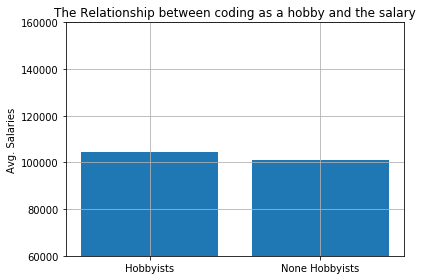

In [3]:
# Point One: The Relationship between coding as a hobby and the salary
start = time.perf_counter()
salaries = data['ConvertedComp']
total_paid = salaries.sum()
avg_salaries = salaries.mean()
yaxis = [60000, 160000]
salary_hobbyist = data.loc[data['Hobbyist'] == 'Yes', 'ConvertedComp']
total_salary_hobbyist = salary_hobbyist.sum()
avg_salary_hobbyist = salary_hobbyist.mean()

salary_none_hobbyist = data.loc[data['Hobbyist'] == 'No', 'ConvertedComp']
total_salary_none_hobbyist = salary_none_hobbyist.sum()
avg_salary_none_hobbyist = salary_none_hobbyist.mean()

# Ploting Data
fig, ax = plt.subplots()
x = np.arange(2)
Labels = ['Hobbyists', 'None Hobbyists'] # An Empty String because there is no need for xLabel

d = [avg_salary_hobbyist, avg_salary_none_hobbyist]
ax.set_ylabel('Avg. Salaries')
ax.set_ylim(yaxis)
ax.set_title('The Relationship between coding as a hobby and the salary')
plt.xticks(x, Labels)
plt.bar(x, d)
plt.grid()
fig.tight_layout()
PLOT_NAME = 'Ques-One-Plot.png'
fig.savefig(os.path.join(REPORTS_PATH, PLOT_NAME))

#Printing Data
msg = 'Point One: The Relationship between coding as a hobby and the salary\n'
msg += ('Total Paid annually: ' + str(int(total_paid)) + ' Per Year\nAvg: ' + str(int(avg_salaries)) + ' Per Year\n')
msg += ('Average Salary for Hobbyists: ' + str(int(avg_salary_hobbyist)) + ' Per Year\nPercent ~= ' + str(int(total_salary_hobbyist*100/total_paid)) + '\n')
msg += ('Average Salary for None-Hobbyists: ' + str(int(avg_salary_none_hobbyist)) + ' Per Year\nPercent ~= ' + str(int(total_salary_none_hobbyist*100/total_paid + 1)) + '\n') # This One Added to make it logical
msg += ('Plot Name: {}\n\n\n\n'.format(PLOT_NAME))
with open(FINAL_REPORT, 'w') as f:
    f.write(msg)
    f.close()
print(msg)

# In 2020 All the salaries was decreased and the coming plot will explain it

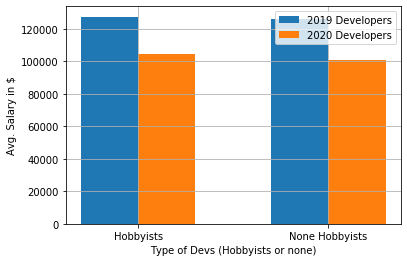

In [13]:
salaries = {"2019": [127380, 126080 ], "2020": [104621, 100895 ]}

width = 0.3
x = np.arange(len(salaries["2019"]))
fig, ax = plt.subplots()

ax.bar(x-width/2, salaries["2019"], width, label="2019 Developers")
ax.bar(x+width/2, salaries["2020"], width, label="2020 Developers")
ax.legend()
ax.set_xlabel("Type of Devs (Hobbyists or none)")
ax.set_ylabel("Avg. Salary in $")
ax.set_xticks(x)
ax.set_xticklabels(["Hobbyists", "None Hobbyists"])
ax.grid(True)

## The Average salaray (whatever the type) was decresed.
#### For Hobbyists: 
The Hobbyists Devs have lost about 17.87% of thier average annual salary as in 2019 they was paid by ~ 127380$ but it 2020 the average salary is ~ 104621$
#### For None Hobbyists:
The None Hobbyists Devs have lost about 19.98% of thier average annual salary as in 2019 they was paid by ~ 127380$ but it 2020 the average salary is ~ 104621$